In [2]:
%pip install numpy matplotlib scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import zipfile
zip_path = 'Hindi-Dataset.zip'  
extract_to = 'Hindi-Dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")

Extraction complete!


In [4]:
import os

# Show folders/files after extracting
print("Contents of extracted folder:")
print(os.listdir('Hindi-Dataset'))

Contents of extracted folder:
['digits', 'Hindi', 'Top-10']


In [5]:
for folder in ['digits', 'Hindi', 'Top-10']:
    path = os.path.join('Hindi-Dataset', folder)
    print(f"\nContents of '{folder}':", os.listdir(path)[:5])  # show first 5 items


Contents of 'digits': ['digits']

Contents of 'Hindi': ['Test', 'Train']

Contents of 'Top-10': ['Test', 'Train']


In [6]:
import imghdr
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

data_dir = os.path.join('Hindi-Dataset', 'Hindi')
train_dir = os.path.join(data_dir, 'Train')
test_dir = os.path.join(data_dir, 'Test')
img_size = 32

X = []
y = []

class_names = sorted([folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))])

for idx, class_folder in enumerate(class_names):
    folder_path = os.path.join(train_dir, class_folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)

        # Skip if not a file or not an image
        if not os.path.isfile(img_path) or imghdr.what(img_path) is None:
            continue

        img = load_img(img_path, target_size=(img_size, img_size), color_mode='grayscale')
        img_array = img_to_array(img) / 255.0
        X.append(img_array)
        y.append(idx)

C:\Users\Asus\AppData\Local\Temp\ipykernel_23844\450222362.py:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
import numpy as np
from tensorflow.keras.utils import to_categorical

def load_dataset(data_dir):
    X = []
    y = []
    class_names = sorted(os.listdir(data_dir))

    for idx, class_folder in enumerate(class_names):
        folder_path = os.path.join(data_dir, class_folder)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)

            if not os.path.isfile(img_path) or imghdr.what(img_path) is None:
                continue

            img = load_img(img_path, target_size=(img_size, img_size), color_mode='grayscale')
            img_array = img_to_array(img) / 255.0
            X.append(img_array)
            y.append(idx)

    return np.array(X), to_categorical(y), class_names

In [8]:
import numpy as np

X_train, y_train, class_names = load_dataset(train_dir)
X_test, y_test, _ = load_dataset(test_dir)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Number of classes:", len(class_names))

Train shape: (78200, 32, 32, 1)
Test shape: (13800, 32, 32, 1)
Number of classes: 46


In [9]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,790 (1.22 MB)

 Trainable params: 319,790 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6636 - loss: 1.2535 - val_accuracy: 0.1159 - val_loss: 23.5666
Epoch 2/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9432 - loss: 0.1931 - val_accuracy: 0.1114 - val_loss: 25.0931
Epoch 3/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9649 - loss: 0.1124 - val_accuracy: 0.1175 - val_loss: 26.7834
Epoch 4/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9766 - loss: 0.0742 - val_accuracy: 0.1123 - val_loss: 27.8210
Epoch 5/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9850 - loss: 0.0477 - val_accuracy: 0.1116 - val_loss: 26.7141
Epoch 6/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9894 - loss: 0.0337 - val_accuracy: 0.1230 - val_loss: 30.0835
Epoch 7/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9915 - loss: 0.0268 - val_accuracy: 0.1061 - val_loss: 29.2946
Epoch 8/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0

In [11]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9678 - loss: 0.2754
Test Accuracy: 0.8846


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


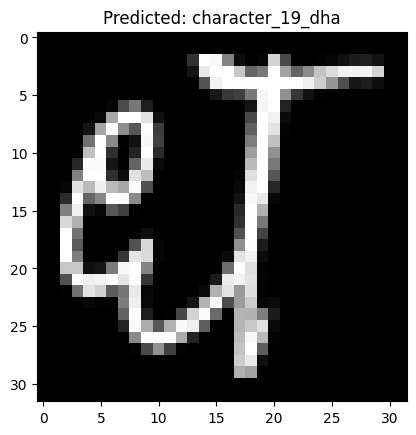

In [21]:
import random
import matplotlib.pyplot as plt
i = random.randint(0, len(X_test)-1)

plt.imshow(X_test[i].reshape(img_size, img_size), cmap='gray')
pred = model.predict(np.expand_dims(X_test[i], axis=0))
plt.title(f"Predicted: {class_names[np.argmax(pred)]}")
plt.axis('on')
plt.show()